# Titanic: Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
>
>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
>
>In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
>
>#### Goal
>
>It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.
>
>#### Metric
>
>Your score is the percentage of passengers you correctly predict. This is known simply as "[accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification)”.

From the competition [homepage](https://www.kaggle.com/c/titanic).

### Goal for this Notebook

### Data
Loading train data with pandas.

In [1]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("data/train.csv")
display(df.head())
print("DataFrame shape: {}".format(df.shape))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DataFrame shape: (891, 12)


In [31]:
titanic = df.copy()

# Dropping and removing NaN values
titanic = titanic.drop(['PassengerId','Ticket','Cabin'], axis=1)
titanic = titanic.dropna()

# Transforming categorical values
titanic['Survived'] = titanic['Survived'].map({1: 'Survived', 0: 'Died'})
titanic['Pclass'] = titanic['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})

display(titanic.head())
print("DataFrame shape: {}".format(titanic.shape))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,Died,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,Survived,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,Survived,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,Survived,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,Died,Third,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


DataFrame shape: (712, 9)


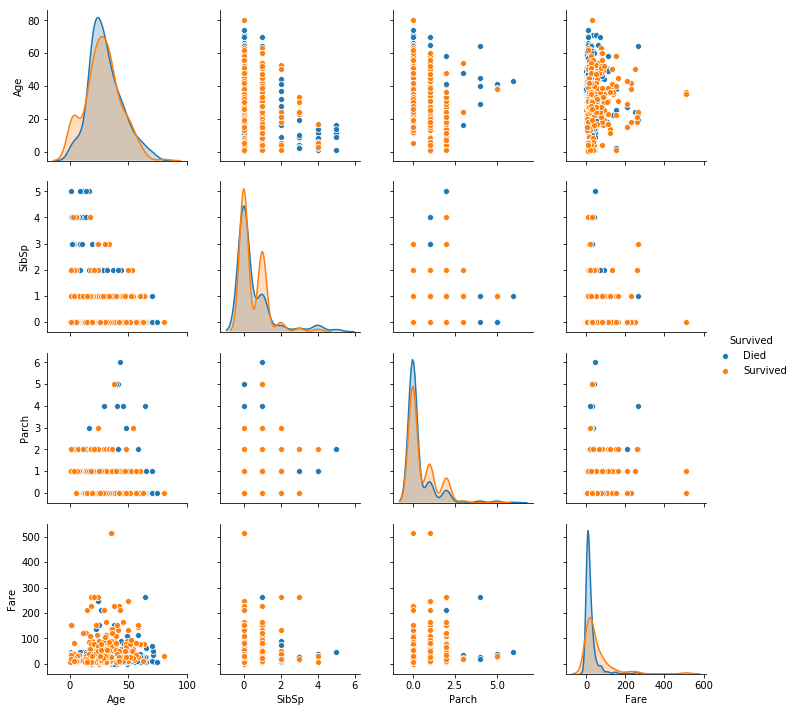

In [40]:
import seaborn as sns
%matplotlib inline

display(sns.pairplot(titanic, hue='Survived'))

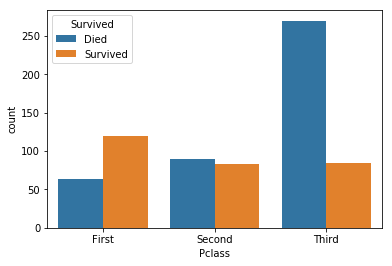

In [41]:
sns.countplot(x='Pclass', order=['First', 'Second', 'Third'], data=titanic, hue='Survived')

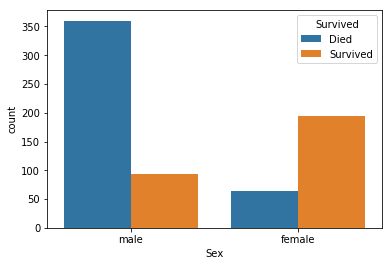

In [42]:
sns.countplot(x='Sex', data=titanic, hue='Survived')

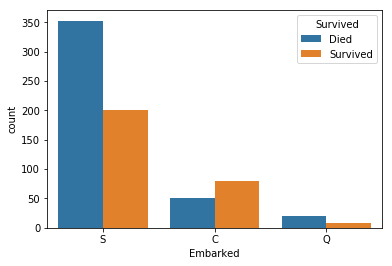

In [43]:
sns.countplot(x='Embarked', data=titanic, hue='Survived')